<a href="https://colab.research.google.com/github/DaniGa-Mo/Challenge_TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📃**Telecom X - Análisis de Evasión de Clientes**

#📌 Extracción

*   Cargar los datos directamente desde la API utilizando Python.
*   Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.




In [52]:
# Importacion de la biblioteca
import pandas as pd

# Carga de los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
# Trasformación a un DataFrame de Pandas
df = pd.read_json(url)

#🔧 Transformación



*   Explorar las columnas del dataset y verificar sus tipos de datos.
*   Consultar el diccionario para comprender mejor el significado de las variables.
*  Identificar las columnas más relevantes para el análisis de evasión.





In [53]:
# Explorando el dataset
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [54]:
# Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [55]:
# Verificar tipo de datos de las columnas
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [56]:
# Resumen estructural completo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


🧪 Comprobación de incoherencias en los datos

En esta etapa se revisa la calidad del conjunto de datos, identificando problemas que puedan afectar el análisis de evasión de clientes. Se analizan valores ausentes, duplicados, errores de formato e inconsistencias en variables categóricas, con el fin de garantizar que los datos estén preparados para las siguientes etapas del proceso analítico.

In [57]:
# Normalización del dataset
df_normalizado = pd.json_normalize(
    df.to_dict(orient='records')
)

df_normalizado.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Una vez normalizado el conjunto de datos, se utilizó el método unique() para identificar los valores categóricos presentes en las variables, permitiendo detectar inconsistencias y preparar los datos para su posterior análisis.

Las columnas seleccionadas corresponden a variables clave en el análisis de evasión, ya que representan la variable objetivo, el tipo de contrato, la forma de pago y los servicios principales contratados por el cliente. Estas variables presentan un alto impacto explicativo y permiten detectar rápidamente inconsistencias que podrían afectar el análisis posterior.

In [58]:
columnas_clave = [
    # Columnas relevantes
    'Churn',
    'account.Contract',
    'customer.tenure',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'account.PaymentMethod',
    'account.PaperlessBilling',
    'account.Charges.Monthly',


    # Columnas para transformar

    'customer.gender',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.InternetService',
    'phone.PhoneService',
    'customer.Partner',
    'customer.Dependents',
    'phone.MultipleLines',
    'internet.StreamingTV',
    'internet.StreamingMovies'



]

for col in columnas_clave:
    print(f"\n{col}")
    print(df_normalizado[col].unique())



Churn
['No' 'Yes' '']

account.Contract
['One year' 'Month-to-month' 'Two year']

customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

internet.OnlineSecurity
['No' 'Yes' 'No internet service']

internet.TechSupport
['Yes' 'No' 'No internet service']

account.PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

account.PaperlessBilling
['Yes' 'No']

account.Charges.Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]

customer.gender
['Female' 'Male']

internet.OnlineBackup
['Yes' 'No' 'No internet service']

internet.DeviceProtection
['No' 'Yes' 'No internet service']

internet.InternetService
['DSL' 'Fiber optic' 'No']

phone.PhoneService
['Yes' 'No']

customer.Partner
['Yes' 'No']

customer.Dependents
['Yes' 'No']

phone.MultipleLines
['No' 'Yes' '

Mediante el uso del método unique() se detectó la presencia de valores vacíos en la variable objetivo Churn, los cuales fueron interpretados como datos faltantes. Dichos registros fueron tratados para asegurar la consistencia del análisis, mientras que el resto de las variables categóricas presentaron valores coherentes y bien definidos.

In [59]:
df_normalizado['account.Charges.Total'] = pd.to_numeric(
    df_normalizado['account.Charges.Total'], errors='coerce'
)


In [60]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [61]:
# Creando columna CUENTAS DIARIAS
df_normalizado['Cuentas_Diarias'] = (
    df_normalizado['account.Charges.Monthly'] / 30
).round(2)


In [62]:
# Verificando
df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


La variable objetivo Churn fue depurada eliminando valores vacíos y posteriormente transformada a formato binario, asignando el valor 1 a los clientes que evadieron el servicio y 0 a aquellos que permanecieron, garantizando consistencia para el análisis posterior.

In [63]:
# Estandartización y transformación de datos
import numpy as np

df_normalizado['Churn'] = (
    df_normalizado['Churn']
    .astype(str)
    .str.strip()
    .replace('', np.nan)
)


In [64]:
# Verificación
df_normalizado['Churn'].unique()


array(['No', 'Yes', nan], dtype=object)

In [65]:
# Un registro sin Churn no sirve para análisis ni modelos, por lo que se elimina
df_normalizado = df_normalizado.dropna(subset=['Churn'])


In [66]:
# Transformación
df_normalizado['Churn'] = (
    df_normalizado['Churn']
    .str.lower()
    .map({
        'yes': 1,
        'no': 0
    })
    .astype(int)
)


Las variables asociadas a servicios adicionales fueron transformadas a formato binario, considerando que los clientes sin servicio de internet o telefonía no pueden disponer de dichas funcionalidades, por lo que estos casos fueron codificados como valor negativo (0).

In [67]:
servicios = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]
map_servicios = {
    'yes': 1,
    'no': 0,
    'no internet service': 0,
    'no phone service': 0
}

#Transformación
for col in servicios:
    df_normalizado[col] = (
        df_normalizado[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map(map_servicios)
        .astype(int)
    )


In [68]:
# Transformación
binarias_simple = [
    'phone.PhoneService',
    'customer.Partner',
    'customer.Dependents',
    'account.PaperlessBilling'
]

for col in binarias_simple:
    df_normalizado[col] = (
        df_normalizado[col]
        .str.strip()        # elimina espacios
        .str.lower()        # normaliza
        .map({
            'yes': 1,
            'no': 0
        })
        .astype(int)
    )


In [69]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64  
 1

Los valores faltantes en la variable de cargos totales correspondían a clientes con antigüedad nula. Estos registros fueron imputados utilizando el producto entre el cargo mensual y la antigüedad del cliente, preservando la coherencia financiera del conjunto de datos sin perder observaciones relevantes para el análisis de evasión.

In [70]:
# Se detectan valores NaN en la columna account.Chatges.Total
df_normalizado['account.Charges.Total'].isna().sum()


np.int64(11)

In [71]:
# Visualización de esas columnas
df_normalizado[df_normalizado['account.Charges.Total'].isna()][
    ['customerID','customer.tenure','account.Charges.Monthly','account.Charges.Total']
].head(20)


,customerID,customer.tenure,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,0,56.05,NaN
1775,2520-SGTTA,0,20.00,NaN
1955,2775-SEFEE,0,61.90,NaN
2075,2923-ARZLG,0,19.70,NaN
2232,3115-CZMZD,0,20.25,NaN
2308,3213-VVOLG,0,25.35,NaN
2930,4075-WKNIU,0,73.35,NaN
3134,4367-NUYAO,0,25.75,NaN
3203,4472-LVYGI,0,52.55,NaN
4169,5709-LVOEQ,0,80.85,NaN


In [72]:
# Imputación de valores
mask_nan = df_normalizado['account.Charges.Total'].isna()

df_normalizado.loc[mask_nan, 'account.Charges.Total'] = (
    df_normalizado.loc[mask_nan, 'account.Charges.Monthly']
    * df_normalizado.loc[mask_nan, 'customer.tenure']
)


In [73]:
# Comprobación
df_normalizado['account.Charges.Total'].isna().sum()


np.int64(0)

In [74]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64  
 1

Durante la transformación de variables categóricas se utilizaron métodos explícitos de conversión de tipos para garantizar compatibilidad con futuras versiones de Pandas y evitar comportamientos implícitos en la conversión de datos.

In [75]:
pd.set_option('display.max_columns', None)

df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

Tras la limpieza, estandarización y transformación de los datos, el conjunto final presenta variables correctamente tipificadas, sin valores faltantes y con métricas coherentes. La tabla descriptiva permite interpretar directamente proporciones en variables binarias y distribuciones en variables continuas, proporcionando una base sólida para el análisis exploratorio y la modelización de la evasión de clientes.

In [76]:
# Descripción detallada en forma de tabla
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer.Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
customer.Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
customer.tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone.PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
phone.MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
internet.OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
internet.OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
internet.DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


Para analizar la distribución de la evasión de clientes, se construyó un subconjunto del dataset que contiene exclusivamente la variable Churn, facilitando su exploración y visualización.

In [77]:
# Analizando la columna evación
df_churn = df_normalizado[['Churn']]

df_churn.head()




,Churn
0,0
1,0
2,1
3,1
4,1


### 📊 Gráfico Churn

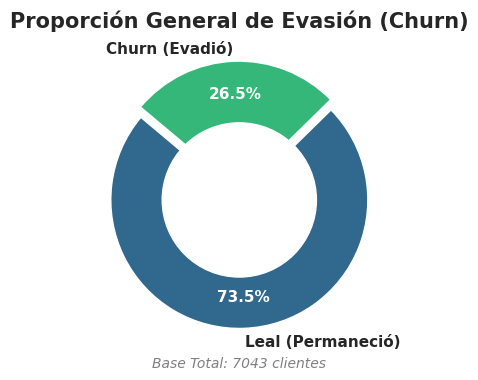

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos los colores de la paleta 'viridis' para mantener la uniformidad
# Usamos el primer y el último color de la paleta
viridis_colors = sns.color_palette("viridis", n_colors=2)

# Configuración de datos
labels = ['Leal (Permaneció)', 'Churn (Evadió)']
sizes = df_normalizado['Churn'].value_counts().sort_index() # Asegura orden 0 y 1

# Resaltar el Churn
explode = (0, 0.08)

plt.figure(figsize=(4, 4))

# Gráfico tipo Dona
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140, # Ajustado para mejor estética con viridis
    explode=explode,
    colors=viridis_colors,
    pctdistance=0.75,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

# Cambiamos el color de los porcentajes internos a blanco para mejor contraste
for autotext in autotexts:
    autotext.set_color('white')

# Crear el círculo central (Dona)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Títulos y detalles
plt.title('Proporción General de Evasión (Churn)', fontsize=15, fontweight='bold', pad=20)
plt.text(0, -1.3, f'Base Total: {sum(sizes)} clientes',
         ha='center', fontsize=10, color='gray', style='italic')

plt.axis('equal')
plt.tight_layout()
plt.savefig("churn_contrato.png", bbox_inches="tight")
plt.show()

El gráfico de pizza muestra la distribución de clientes según su estado de evasión. Se observa que aproximadamente un 26,5 % de los clientes abandonaron el servicio, lo que representa una proporción significativa y justifica el análisis de los factores asociados al churn.

In [79]:
# Valores
churn_counts = df_churn.value_counts().sort_index()

### 📊 Churn VS Tipo Contrato

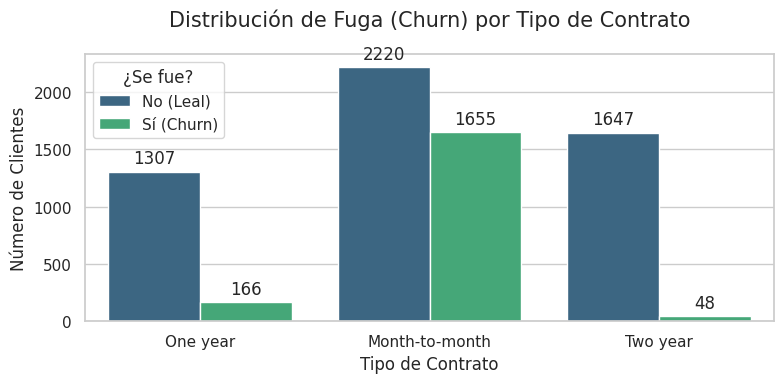

In [80]:
# Configuramos el estilo
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))

# Adaptamos x a 'customer.contract_type'
ax = sns.countplot(
    x='account.Contract',
    hue='Churn',
    data=df_normalizado,
    palette='viridis'
)

# Añadimos etiquetas de datos sobre cada barra (Cantidades exactas)
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Personalización adaptada al contrato
plt.title('Distribución de Fuga (Churn) por Tipo de Contrato', fontsize=15, pad=20)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='¿Se fue?', labels=['No (Leal)', 'Sí (Churn)'])

# Ajustamos los límites para que no se corten los números arriba
plt.tight_layout()
plt.savefig("Churn_VS_Tipo_contrato.png", bbox_inches="tight")
plt.show()

El análisis de la evasión según tipo de contrato evidencia una relación inversa entre la duración del contrato y la probabilidad de cancelación. Los clientes con contratos mensuales presentan la mayor tasa de churn, mientras que aquellos con contratos anuales y bianuales muestran una evasión considerablemente menor, lo que resalta la importancia del compromiso contractual en la retención de clientes.

### 📊 Churn VS Antiguedad Cliente (Tenure)

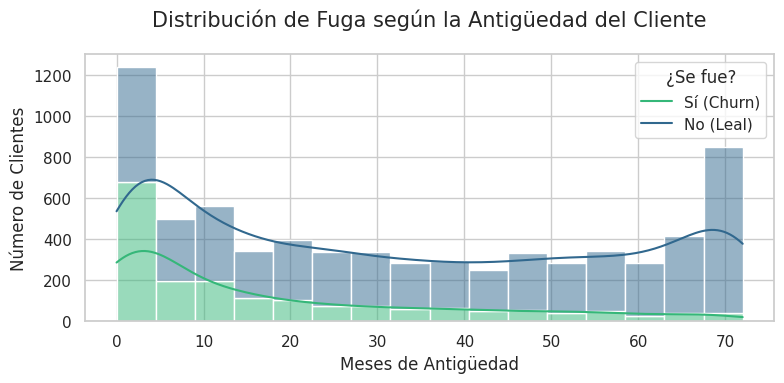

In [81]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

# Utilizamos histplot para ver la distribución de la antigüedad
ax = sns.histplot(
    data=df_normalizado,
    x='customer.tenure', # O el nombre exacto de tu columna de meses/años
    hue='Churn',
    multiple="stack",    # Apila las barras para ver el total
    palette='viridis',
    kde=True             # Añade una línea de densidad para ver la tendencia
)

# Personalización
plt.title('Distribución de Fuga según la Antigüedad del Cliente', fontsize=15, pad=20)
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='¿Se fue?', labels=['Sí (Churn)', 'No (Leal)']) # Invertido por el orden de apilado

plt.tight_layout()
plt.savefig("churn_vs_Antiguedad.png", bbox_inches="tight")
plt.show()

El análisis de la evasión en función de la antigüedad del cliente evidencia que la probabilidad de cancelación es considerablemente mayor durante los primeros meses de servicio. A medida que aumenta la antigüedad, la tasa de churn disminuye de forma sostenida, lo que sugiere que la permanencia y la experiencia acumulada influyen positivamente en la retención.

### 📊 Churn VS Soporte Técnico

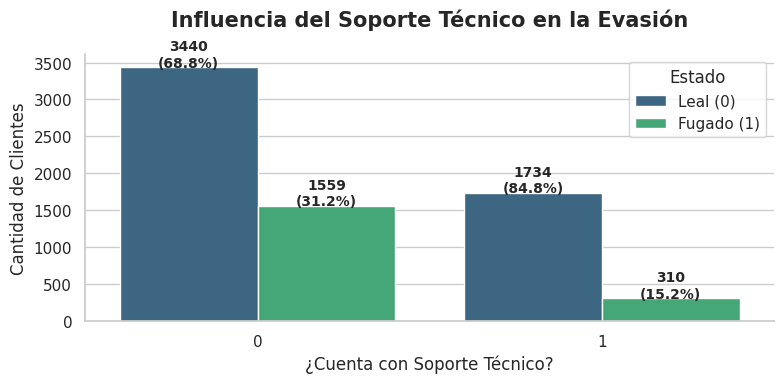

In [82]:
# 1. Calculamos porcentajes para las etiquetas
stats_tech = df_normalizado.groupby('internet.TechSupport')['Churn'].value_counts(normalize=True).unstack() * 100

# 2. Configuración estética
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

# 3. Gráfico de barras agrupadas
ax = sns.countplot(
    x='internet.TechSupport',
    hue='Churn',
    data=df_normalizado,
    palette='viridis'
)

# 4. Agregar etiquetas de cantidad y porcentaje
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        # Lógica para posicionar % correcto
        n_categories = len(stats_tech.index)
        cat_idx = i % n_categories
        churn_type = 1 if i >= n_categories else 0
        percentage = stats_tech.iloc[cat_idx, churn_type]

        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{int(height)}\n({percentage:.1f}%)',
                ha="center", fontsize=10, fontweight='bold')

# 5. Personalización final
plt.title('Influencia del Soporte Técnico en la Evasión', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('¿Cuenta con Soporte Técnico?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Leal (0)', 'Fugado (1)'])

sns.despine()
plt.tight_layout()
plt.savefig("churn_vs_soporte_tecnico.png", bbox_inches="tight")
plt.show()

El análisis evidencia que los clientes que cuentan con soporte técnico presentan una tasa de evasión significativamente menor en comparación con aquellos que no disponen de este servicio. La diferencia observada sugiere que el soporte técnico actúa como un factor relevante de retención, probablemente asociado a una mejor experiencia y resolución de problemas del cliente.

### 📊 Churn VS Seguridad Online

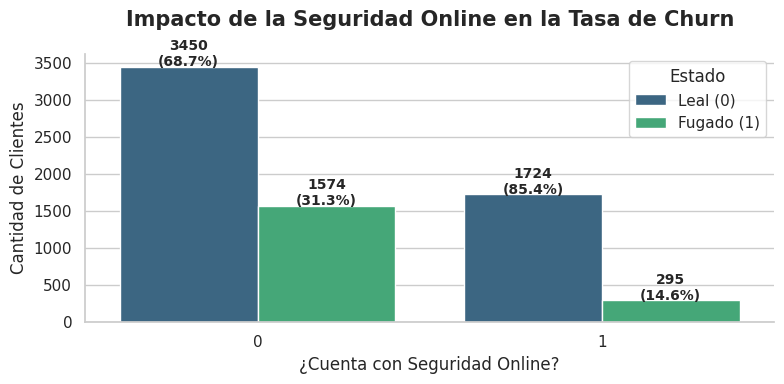

In [83]:
# 1. Calculamos porcentajes para las etiquetas
stats_sec = df_normalizado.groupby('internet.OnlineSecurity')['Churn'].value_counts(normalize=True).unstack() * 100

# 2. Configuración estética
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

# 3. Gráfico de barras agrupadas (hue='Churn' evita el warning)
ax = sns.countplot(
    x='internet.OnlineSecurity',
    hue='Churn',
    data=df_normalizado,
    palette='viridis'
)

# 4. Agregar etiquetas de cantidad y porcentaje
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        n_categories = len(stats_sec.index)
        cat_idx = i % n_categories
        churn_type = 1 if i >= n_categories else 0
        percentage = stats_sec.iloc[cat_idx, churn_type]

        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{int(height)}\n({percentage:.1f}%)',
                ha="center", fontsize=10, fontweight='bold')

# 5. Personalización
plt.title('Impacto de la Seguridad Online en la Tasa de Churn', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('¿Cuenta con Seguridad Online?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Leal (0)', 'Fugado (1)'])

sns.despine()
plt.tight_layout()
plt.savefig("churn_vs_seguriddad_online.png", bbox_inches="tight")
plt.show()

El análisis evidencia que los clientes que cuentan con seguridad online presentan una tasa de evasión significativamente menor en comparación con aquellos que no disponen de este servicio. La diferencia observada sugiere que la seguridad online actúa como un factor relevante de retención, probablemente asociado a una mayor percepción de valor y confianza en el servicio.

### 📊 Churn VS Metodo de Pago

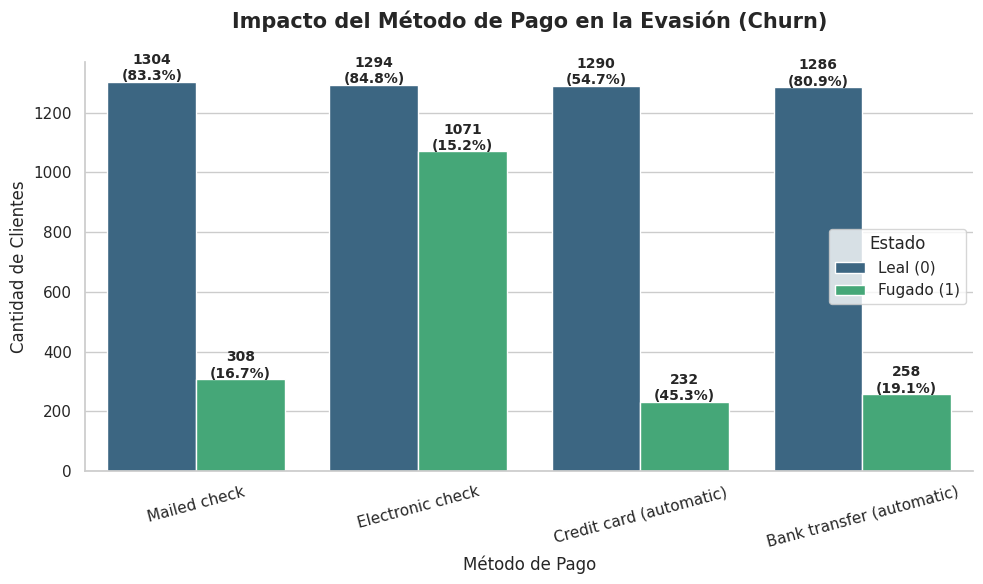

In [84]:
# 1. Calculamos los porcentajes por cada método de pago para las etiquetas
stats_pago = df_normalizado.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100

# 2. Configuración estética
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 3. Gráfico principal (Ajustado para evitar el Warning)
ax = sns.countplot(
    x='account.PaymentMethod',
    hue='Churn',
    data=df_normalizado,
    palette='viridis'
)

# 4. Agregar etiquetas de cantidad y porcentaje sobre las barras
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        # Lógica para encontrar el porcentaje correcto
        # Las primeras N barras son Churn=0, las siguientes N son Churn=1
        n_categories = len(stats_pago.index)
        cat_idx = i % n_categories
        churn_type = 1 if i >= n_categories else 0
        percentage = stats_pago.iloc[cat_idx, churn_type]

        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{int(height)}\n({percentage:.1f}%)',
                ha="center", fontsize=10, fontweight='bold')

# 5. Personalización
plt.title('Impacto del Método de Pago en la Evasión (Churn)', fontsize=15, pad=25, fontweight='bold')
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Leal (0)', 'Fugado (1)'])

# Rotamos las etiquetas del eje X si son muy largas
plt.xticks(rotation=15)
sns.despine()
plt.tight_layout()
plt.savefig("churn_vs_metodo_pago.png", bbox_inches="tight")
plt.show()

El análisis del churn según el método de pago evidencia diferencias significativas en las tasas de evasión. Los clientes que utilizan Electronic check presentan la mayor proporción de cancelaciones, mientras que los métodos de pago automáticos, como tarjeta de crédito y transferencia bancaria, muestran una mayor retención. Esto sugiere que el nivel de automatización del pago está asociado al compromiso del cliente y a una menor probabilidad de evasión.

### 📊 Churn VS Factura Electronica

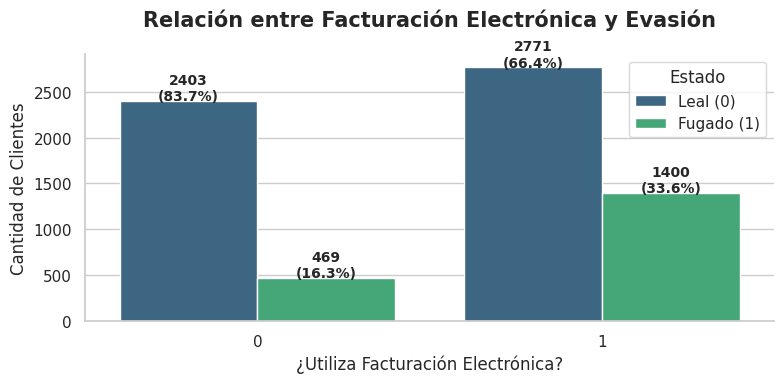

In [85]:
# 1. Calculamos porcentajes para las etiquetas
stats_paperless = df_normalizado.groupby('account.PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100

# 2. Configuración estética
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

# 3. Gráfico de barras agrupadas (hue='Churn' para evitar warnings)
ax = sns.countplot(
    x='account.PaperlessBilling',
    hue='Churn',
    data=df_normalizado,
    palette='viridis'
)

# 4. Agregar etiquetas de cantidad y porcentaje
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        n_categories = len(stats_paperless.index)
        cat_idx = i % n_categories
        churn_type = 1 if i >= n_categories else 0
        percentage = stats_paperless.iloc[cat_idx, churn_type]

        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{int(height)}\n({percentage:.1f}%)',
                ha="center", fontsize=10, fontweight='bold')

# 5. Personalización
plt.title('Relación entre Facturación Electrónica y Evasión', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('¿Utiliza Facturación Electrónica?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Leal (0)', 'Fugado (1)'])

sns.despine()
plt.tight_layout()
plt.savefig("churn_vs_Factura_electronica.png", bbox_inches="tight")
plt.show()

Se identifica una correlación positiva entre el uso de Facturación Electrónica y la tasa de evasión. Los clientes que reciben facturas digitales presentan una mayor tendencia al abandono en comparación con aquellos que utilizan facturación tradicional. Este fenómeno puede estar vinculado a que el cliente digital suele ser más joven, tiene menos barreras de salida y es más propenso a comparar ofertas de la competencia en línea de manera inmediata tras recibir su notificación de cobro.

### 📊 Churn VS Cuentas Diarias

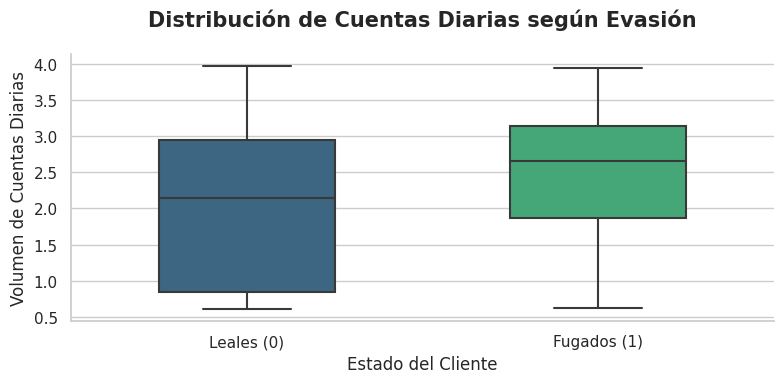

In [86]:
# Estilo profesional
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

ax = sns.boxplot(
    x='Churn',
    y='Cuentas_Diarias',
    data=df_normalizado,
    hue='Churn',        # Asignamos Churn a hue para evitar el warning
    palette='viridis',
    legend=False,       # Quitamos la leyenda porque el eje X ya dice qué es cada color
    width=0.5,
    linewidth=1.5
)


# Títulos y etiquetas
plt.title('Distribución de Cuentas Diarias según Evasión', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Volumen de Cuentas Diarias', fontsize=12)
plt.xticks([0, 1], ['Leales (0)', 'Fugados (1)'])

sns.despine()
plt.tight_layout()
plt.savefig("churn_vs_cuentas_diarias.png", bbox_inches="tight")
plt.show()

El análisis de la variable Cuentas_Diarias muestra que los clientes que evaden presentan, en promedio, un mayor costo diario del servicio en comparación con los clientes leales. Si bien existe solapamiento entre ambos grupos, la mediana y la distribución indican que el costo diario constituye un factor relevante en la evasión, aunque no suficiente por sí solo para explicarla, lo que sugiere la influencia conjunta de otros factores como la antigüedad y el tipo de contrato.

### 📊 Churn VS Edad

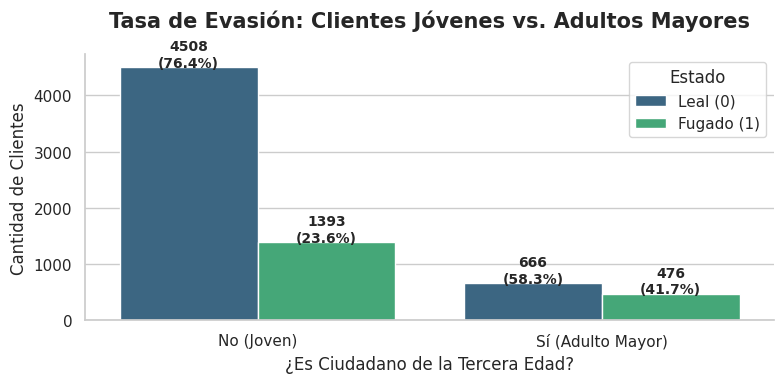

In [87]:
# 1. Calculamos porcentajes para las etiquetas
# Convertimos a strings para que el gráfico sea más legible en el eje X
df_plot = df_normalizado.copy()
df_plot['customer.SeniorCitizen'] = df_plot['customer.SeniorCitizen'].map({0: 'No (Joven)', 1: 'Sí (Adulto Mayor)'})

stats_senior = df_plot.groupby('customer.SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# 2. Configuración estética
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

# 3. Gráfico de barras agrupadas
ax = sns.countplot(
    x='customer.SeniorCitizen',
    hue='Churn',
    data=df_plot,
    palette='viridis'
)

# 4. Agregar etiquetas de cantidad y porcentaje
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        n_categories = len(stats_senior.index)
        cat_idx = i % n_categories
        churn_type = 1 if i >= n_categories else 0
        percentage = stats_senior.iloc[cat_idx, churn_type]

        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{int(height)}\n({percentage:.1f}%)',
                ha="center", fontsize=10, fontweight='bold')

# 5. Personalización
plt.title('Tasa de Evasión: Clientes Jóvenes vs. Adultos Mayores', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('¿Es Ciudadano de la Tercera Edad?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Leal (0)', 'Fugado (1)'])

sns.despine()
plt.tight_layout()
plt.savefig("churn_vs_rango_edad.png", bbox_inches="tight")
plt.show()

El segmento de Adultos Mayores (Senior Citizens), aunque representa una porción menor de la base total de clientes, muestra una tasa de evasión proporcionalmente superior a la de los clientes más jóvenes. Mientras que los clientes jóvenes mantienen una mayor estabilidad.

### 📊 Churn VS Género cliente

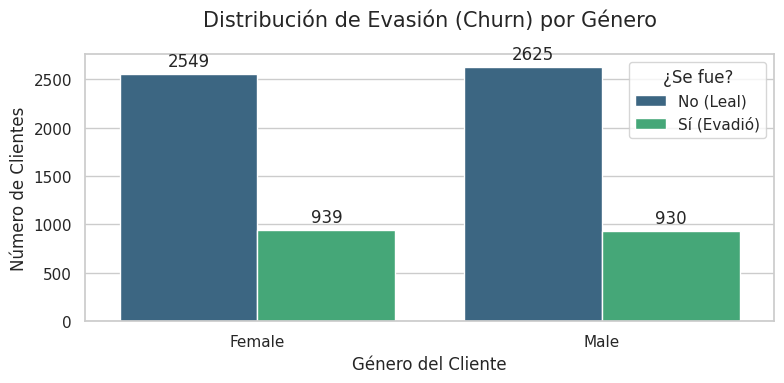

In [88]:
# Configuramos un estilo más limpio
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))

# Creamos el gráfico con una paleta de colores profesional
ax = sns.countplot(
    x='customer.gender',
    hue='Churn',
    data=df_normalizado,
    palette='viridis' # Colores modernos y con buen contraste
)

# Añadimos etiquetas de datos sobre cada barra
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Personalización de títulos y etiquetas
plt.title('Distribución de Evasión (Churn) por Género', fontsize=15, pad=20)
plt.xlabel('Género del Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='¿Se fue?', labels=['No (Leal)', 'Sí (Evadió)'])

# Ajustamos los límites para que las etiquetas no se corten
plt.tight_layout()
plt.show()

El análisis de la evasión según género muestra que las tasas de churn entre hombres y mujeres son muy similares, sin diferencias significativas. Esto sugiere que el género, por sí solo, no constituye un factor determinante en la cancelación del servicio, siendo más relevantes otras variables contractuales y de uso del servicio.

#📄Informe final
Telecom X - Análisis de Evasión de Clientes

## **Autor:** *Daniel Gallardo M.*

## Introducción

La evasión de clientes (churn) representa uno de los principales desafíos para las empresas de servicios, ya que impacta directamente en los ingresos y en la sostenibilidad del negocio. Comprender qué factores influyen en la cancelación del servicio permite diseñar estrategias efectivas de retención y fidelización.

El objetivo de este análisis es identificar los factores más influyentes en la evasión de clientes, utilizando técnicas de limpieza, transformación y análisis exploratorio de datos (EDA), con el fin de obtener insights accionables que ayuden a reducir la tasa de churn.

## 🔹 Limpieza y Tratamiento de Datos

Para garantizar la calidad del análisis, se realizaron los siguientes pasos:

✅Carga de datos desde un repositorio externo (GitHub) y conversión a un DataFrame de Pandas.

✅Normalización de datos JSON mediante json_normalize, facilitando la manipulación de columnas anidadas.

✅Revisión de tipos de datos, corrigiendo inconsistencias y convirtiendo variables numéricas y categóricas según corresponda.

✅Tratamiento de valores faltantes y vacíos, especialmente en variables categóricas.

✅Estandarización de variables binarias, transformando valores como Yes / No a 1 / 0 para facilitar el análisis.

✅Creación de nuevas variables, destacando la columna Cuentas_Diarias, calculada a partir de la facturación mensual para representar el costo diario del servicio.

Estos pasos permitieron contar con un dataset limpio, consistente y adecuado para el análisis exploratorio.

## 🔹 Análisis Exploratorio de Datos (EDA)

Durante el análisis exploratorio se estudiaron distintas variables para comprender su relación con la evasión de clientes:

📌 Distribución del Churn


*   Se observó que aproximadamente una cuarta parte de los  clientes cancelaron el servicio.
*   La variable Churn fue analizada mediante gráficos de proporción para visualizar la magnitud del problema.



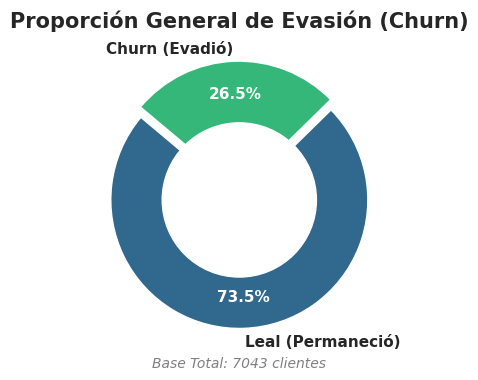




📌 Tipo de Contrato

* Los clientes con contrato mensual presentan la mayor tasa de evasión.

* A medida que aumenta la duración del contrato (anual y bianual), el churn disminuye considerablemente.

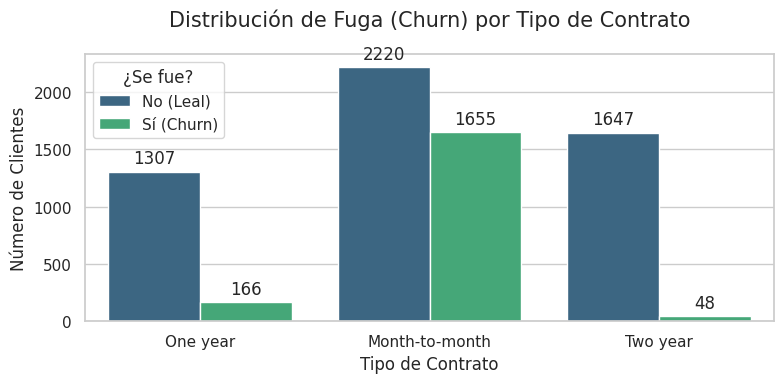

📌 Antigüedad del Cliente (Tenure)

* El churn se concentra principalmente en los primeros meses de relación.

* Los clientes con mayor antigüedad muestran una probabilidad mucho menor de evasión.

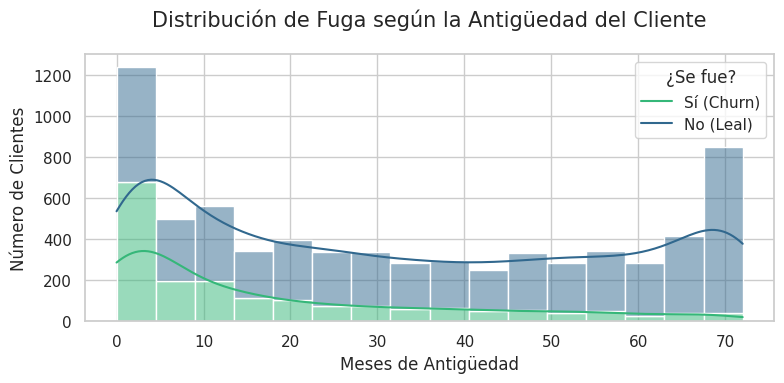


📌 Método de Pago

* El método Electronic check presenta la mayor tasa de churn.

* Los métodos de pago automáticos (tarjeta de crédito y transferencia bancaria) están asociados a una mayor retención.

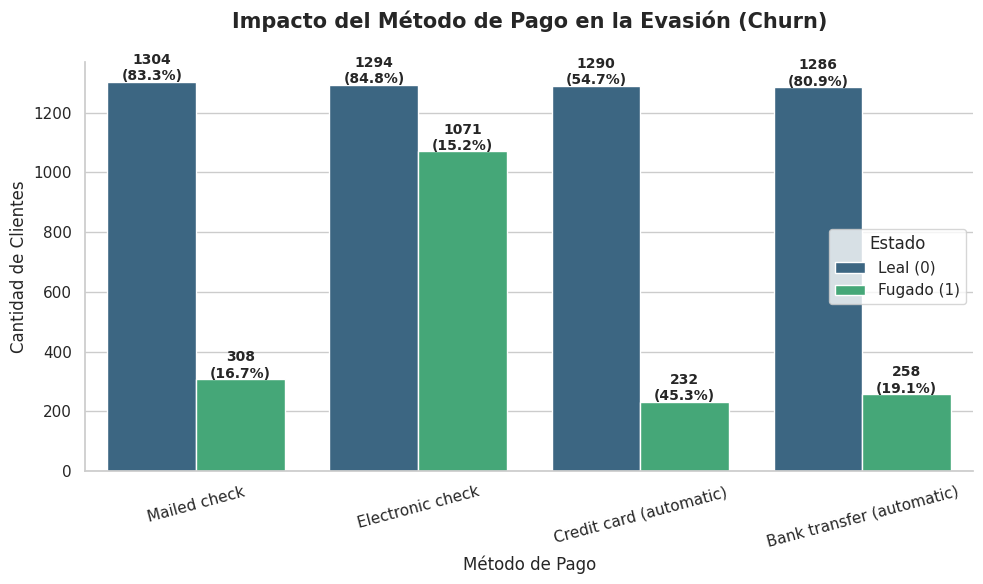

📌 Servicios de Valor Agregado

* Clientes que no cuentan con soporte técnico o seguridad online presentan tasas de evasión cercanas al 30%.

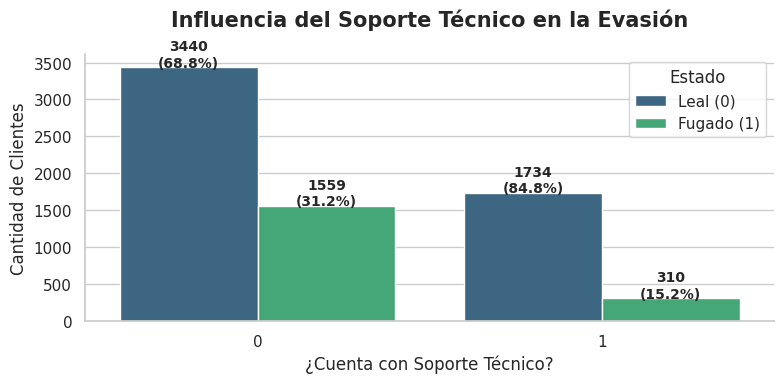

* La presencia de estos servicios reduce el churn a casi la mitad, evidenciando su impacto en la experiencia del cliente.

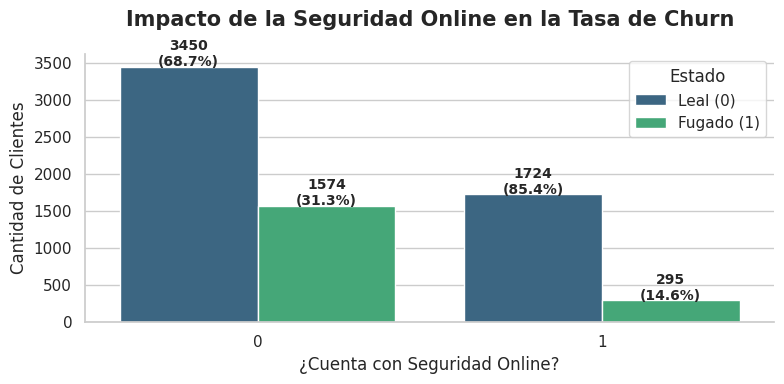

📌 Cuentas Diarias (Costo Diario)

* Los clientes que evaden presentan, en promedio, un costo diario mayor.

* Si bien existe solapamiento entre grupos, el costo diario actúa como un factor complementario en la evasión.

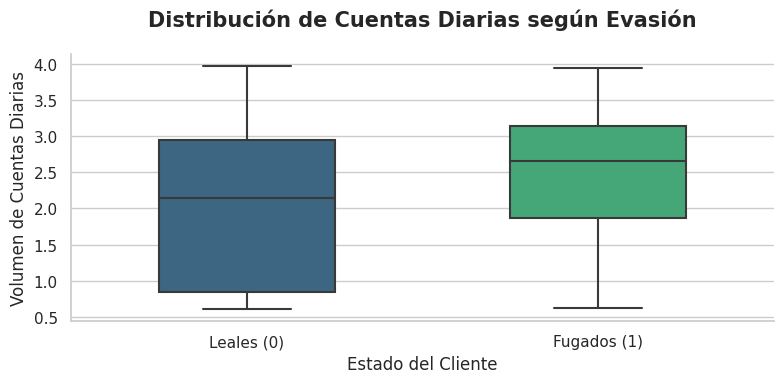

## 🔹 Conclusiones e Insights

A partir del análisis realizado, se identificaron los siguientes hallazgos clave:

* El churn no es un fenómeno aleatorio, sino que responde a patrones claros.

* El tipo de contrato y la antigüedad del cliente son los factores más influyentes.

* Los servicios de valor agregado (soporte técnico y seguridad online) reducen significativamente la evasión.

* El método de pago funciona como una señal de compromiso del cliente.

* El costo diario del servicio influye en la evasión, especialmente cuando se combina con baja antigüedad y contratos de corto plazo.

Estos insights permiten comprender mejor el comportamiento de los clientes y los factores que aumentan el riesgo de cancelación.

## 🔹 Recomendaciones Estratégicas

En base a los patrones identificados en el análisis exploratorio, se proponen las siguientes acciones para reducir la evasión de clientes (churn):

1) Incentivar contratos de mayor duración (retención por compromiso)

*  Problema detectado: El churn es significativamente mayor en contratos mensuales.

* Acción: Implementar campañas de migración desde Month-to-month hacia One year y Two year con:

    * Descuentos escalonados por permanencia,

    * Meses gratis por renovación,

    * Beneficios adicionales (ej. upgrade temporal).

* Impacto esperado: Reducir churn aumentando el compromiso contractual.

2) Intervención temprana en clientes nuevos (tenure bajo)

Problema detectado: El churn se concentra en los primeros meses.

* Acción: Crear un plan de “primeros 90 días”:

    * Onboarding guiado,

    * Seguimiento proactivo (primer mes),

    * Alertas por baja interacción o reclamos,

    * Encuestas cortas de satisfacción temprana.

* Impacto esperado: Prevenir evasión en la etapa de mayor riesgo.

3) Promover pagos automáticos y reducir fricción del Electronic check

* Problema detectado: El método Electronic check presenta la mayor evasión, mientras que pagos automáticos muestran mayor retención.

* Acción:

    * Incentivar inscripción en pago automático (tarjeta/transferencia) con descuento o beneficios.

    * Simplificar el proceso de inscripción (1–2 pasos).

    * Recordatorios y comunicación clara para clientes con pago manual.

* Impacto esperado: Aumentar retención reduciendo fricción y mejorando continuidad del pago.

4) Potenciar servicios de valor agregado (Soporte Técnico y Seguridad Online)

* Problema detectado: Clientes sin TechSupport y sin OnlineSecurity presentan tasas de churn mucho más altas.

* Acción:

    * Ofrecer “packs de retención” que incluyan soporte y seguridad a precio reducido durante los primeros meses.

    * Promociones de prueba (ej. 2–3 meses) para clientes de alto riesgo.

    * Comunicación enfocada en valor: “protección + asistencia” como mejora de experiencia.

* Impacto esperado: Reducir churn aumentando percepción de valor y disminuyendo frustración técnica.

5) Segmentar y priorizar clientes de alto riesgo (estrategia focalizada)

* Patrón de riesgo identificado:
Contrato mensual + tenure bajo + pago manual (Electronic check) + costo diario alto + sin soporte/seguridad

* Acción: Implementar un esquema de segmentación con 2–3 niveles:

    * Riesgo alto: intervención proactiva inmediata (ofertas, soporte, contacto).

    * Riesgo medio: campañas automatizadas (email/SMS).

    * Riesgo bajo: fidelización (beneficios de permanencia).

* Impacto esperado: Retención más eficiente y mejor uso de recursos.

6) Optimización de oferta vs costo percibido (Cuentas_Diarias)

* Problema detectado: Los clientes que evaden tienden a tener mayor costo diario.

* Acción:

    * Ofrecer alternativas de plan (downgrade controlado) antes de cancelar,

    * Crear bundles con valor agregado (seguridad/soporte/streaming) para justificar el precio,

    * Descuentos temporales dirigidos a clientes con costos altos y baja antigüedad.

* Impacto esperado: Reducir churn al mejorar la relación “precio percibido vs valor”.